<a href="https://colab.research.google.com/github/MArcoAEAandrade/ic-inclusao-financeira/blob/main/01_exploracao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Exploração e Limpeza de Dados (IC Marketing)

Este notebook faz parte da Iniciação Científica 'Inclusão Financeira de Jovens Periféricos: Comportamento e Barreiras' e serve como base para a coleta de dados primários.

## Importação de Bibliotecas e Carregamento de Dados

In [767]:
import pandas as pd

In [768]:
import numpy as np

In [769]:
import matplotlib.pyplot as plt

In [770]:
import seaborn as sns

In [771]:
pd.set_option('display.max_columns', None)

In [772]:
pd.set_option('display.max_rows', None)

### Carregamento do Relatório de Cidadania Financeira (2021)

In [773]:
# O arquivo original é um .xlsx e as abas relevantes foram identificadas na análise secundária.

In [774]:
file_path_financeira = 'Anexo_Estatístico_do_Relatório_de_Cidadania_Financeira_2021.xlsx'

In [775]:
# Exemplo de carregamento da aba G 2.1.1 (Bancarização por Idade)

In [776]:
df_bancarizacao = pd.read_excel(file_path_financeira, sheet_name='G 2.1.2', skiprows=4)

In [777]:
print('Primeiras linhas da Bancarização por Idade:')

Primeiras linhas da Bancarização por Idade:


In [778]:
print(df_bancarizacao.head())

   Unnamed: 0 Idade  Jovens no SFN  População Jovem  % população no SFN
0         NaN    15         493535          2881093               0.171
1         NaN    16         834154          2937747               0.284
2         NaN    17        1120875          3000152               0.374
3         NaN    18        2124287          3077428               0.690
4         NaN    19        2720038          3182777               0.855


In [779]:
print('\nInformações sobre as colunas:')


Informações sobre as colunas:


In [780]:
print(df_bancarizacao.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          0 non-null      float64
 1   Idade               16 non-null     object 
 2   Jovens no SFN       16 non-null     int64  
 3   População Jovem     16 non-null     int64  
 4   % população no SFN  16 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 772.0+ bytes
None


### Carregamento do PNADC (São Paulo)

In [781]:
file_path_pnadc = 'PNADC-PesquisaNacionalporAmostradeDomicíliosContínua-SãoPaulo.csv'

In [782]:
# O arquivo PNADC é um .csv com delimitador ';'

In [783]:
df_pnadc = pd.read_csv(file_path_pnadc, sep=';')

In [784]:
print('\nPrimeiras linhas do PNADC:')


Primeiras linhas do PNADC:


In [785]:
print(df_pnadc.head())

   Nível                                          Indicador  2012  2013  2014  \
0      1  Acesso à Internet e à televisão e posse de tel...   NaN   NaN   NaN   
1    1.1                Domicílios particulares permanentes   NaN   NaN   NaN   
2  1.1.1            Existência de microcomputador ou tablet   NaN   NaN   NaN   
3  1.1.2           Existência de telefone fixo convencional   NaN   NaN   NaN   
4  1.1.3               Existência de telefone móvel celular   NaN   NaN   NaN   

   2015  2016  2017  2018  2019  2020  2021  2022  2023  2024     Unidade  
0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN         NaN  
1   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  domicilios  
2   NaN  62.7  59.0  56.5  55.4   NaN  56.1  54.5   NaN   NaN           %  
3   NaN  55.6  50.7  44.7  38.0   NaN  26.0  20.8  17.2  14.4           %  
4   NaN  95.1  95.5  95.7  96.6   NaN  97.6  97.6  97.9  98.0           %  


In [786]:
print('\nInformações sobre as colunas:')


Informações sobre as colunas:


In [787]:
print(df_pnadc.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577 entries, 0 to 576
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Nível      577 non-null    object 
 1   Indicador  576 non-null    object 
 2   2012       26 non-null     float64
 3   2013       26 non-null     float64
 4   2014       26 non-null     float64
 5   2015       26 non-null     float64
 6   2016       87 non-null     float64
 7   2017       87 non-null     float64
 8   2018       87 non-null     float64
 9   2019       101 non-null    float64
 10  2020       27 non-null     float64
 11  2021       45 non-null     float64
 12  2022       145 non-null    float64
 13  2023       108 non-null    float64
 14  2024       45 non-null     float64
 15  Unidade    348 non-null    object 
dtypes: float64(13), object(3)
memory usage: 72.3+ KB
None


### Carregamento do Relatório de Saúde Financeira (2024)

In [788]:
# O arquivo é um PDF, mas os dados chave foram extraídos na análise secundária.

In [789]:
# Para fins de exploração, vamos criar um DataFrame simulado com os principais insights.

In [790]:
data_saude_financeira = {
    'Indicador': ['I-SFB Média', 'Aperto Financeiro (%)', 'Dificuldade Pagar Contas (%)', 'Sobra Dinheiro (%)', 'Controle Gasto (%)'],
    '2024': [56.7, 48.4, 41.0, 58.6, 48.6],
    '2023': [56.2, 49.9, 43.2, 57.3, 46.4]
}

In [791]:
df_saude_financeira = pd.DataFrame(data_saude_financeira)

In [792]:
print('\nInsights do Relatório de Saúde Financeira:')


Insights do Relatório de Saúde Financeira:


In [793]:
print(df_saude_financeira)

                      Indicador  2024  2023
0                   I-SFB Média  56.7  56.2
1         Aperto Financeiro (%)  48.4  49.9
2  Dificuldade Pagar Contas (%)  41.0  43.2
3            Sobra Dinheiro (%)  58.6  57.3
4            Controle Gasto (%)  48.6  46.4


## Limpeza e Pré-processamento Inicial

#### Limpeza do DataFrame de Bancarização

In [794]:
# Renomear colunas para facilitar o acesso

In [795]:
# A coluna 'Unnamed: 0' parece estar vazia e deve ser removida.
if 'Unnamed: 0' in df_bancarizacao.columns:
    df_bancarizacao = df_bancarizacao.drop(columns=['Unnamed: 0'])

# Agora, com base na saída de df_bancarizacao.head() após a remoção,
# as colunas restantes são (Idade, Jovens no SFN, População Jovem, % população no SFN)
# Vamos renomeá-las para refletir melhor seu conteúdo.
df_bancarizacao.columns = ['Faixa_Etaria', 'Jovens no SFN', 'População Jovem', '% população jovem no SFN']

In [796]:
# Remover linhas com valores nulos na coluna de Faixa Etária

In [797]:
df_bancarizacao.dropna(subset=['Faixa_Etaria'], inplace=True)

In [798]:
print(df_bancarizacao.head())

  Faixa_Etaria  Jovens no SFN  População Jovem  % população jovem no SFN
0           15         493535          2881093                     0.171
1           16         834154          2937747                     0.284
2           17        1120875          3000152                     0.374
3           18        2124287          3077428                     0.690
4           19        2720038          3182777                     0.855


#### Limpeza do DataFrame PNADC

In [799]:
# O PNADC possui uma estrutura de dados mais complexa. Vamos focar nos indicadores de interesse.

In [800]:
# Exemplo: Filtrar indicadores de Raça/Cor

In [801]:
df_raca = df_pnadc[df_pnadc['Nível'].isin(['3.1.2.1', '3.1.2.2', '3.1.2.3'])].copy()

In [802]:
df_raca.rename(columns={'Indicador': 'Raça/Cor'}, inplace=True)

In [803]:
print(df_raca[['Raça/Cor', '2023']].head())

   Raça/Cor  2023
77   Branca  56.4
78    Parda  33.0
79    Preta   8.8


## Visualização Exploratória de Dados (VED)

#### VED 1: Bancarização por Faixa Etária (Relatório Financeiro)

<Axes: title={'center': 'Bancarização por idade'}, xlabel='Faixa_Etaria', ylabel='% população jovem no SFN'>

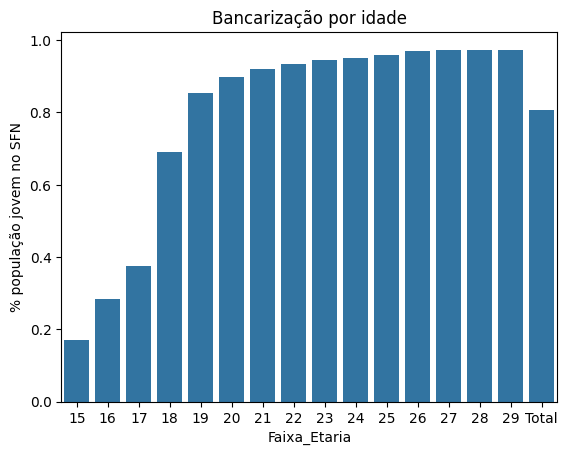

In [804]:
plt.title('Bancarização por idade')
sns.barplot(x='Faixa_Etaria', y='% população jovem no SFN', data=df_bancarizacao)

<Axes: title={'center': 'Bancarização por idade'}, xlabel='% população jovem no SFN', ylabel='Faixa_Etaria'>

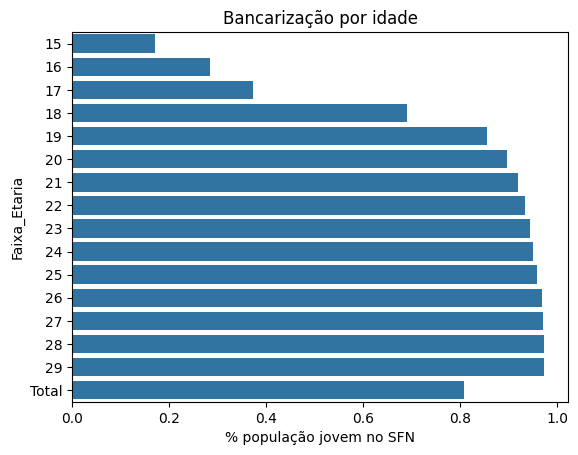

In [806]:
plt.title('Bancarização por idade')
sns.barplot(x='% população jovem no SFN', y='Faixa_Etaria', data=df_bancarizacao)

In [807]:
plt.show()

#### VED 2: Distribuição Racial (PNADC)

In [827]:
df_raca_plot = df_raca[['Raça/Cor', '2023']].set_index('Raça/Cor')

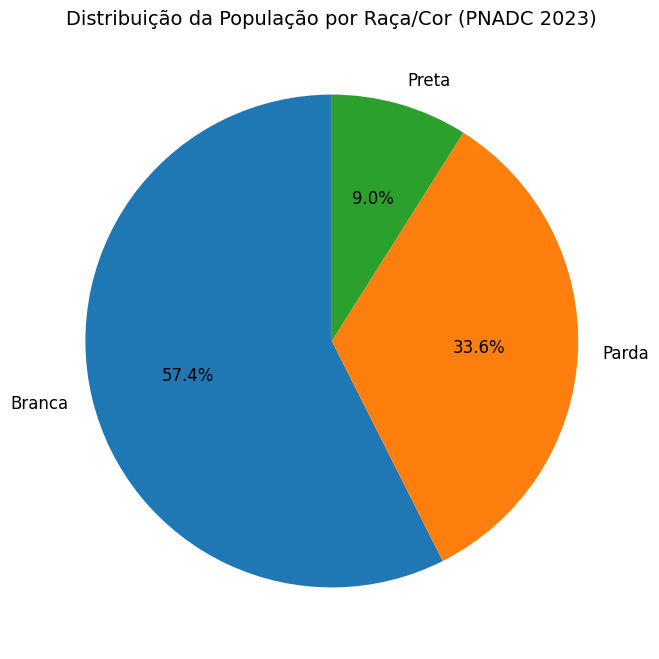

In [824]:
plt.figure(figsize=(8, 8))

plt.pie(
    df_raca_plot['2023'],
    labels=df_raca_plot.index,
    autopct='%1.1f%%',
    startangle=90,
    textprops={'fontsize': 12}
)

plt.title('Distribuição da População por Raça/Cor (PNADC 2023)', fontsize=14)
plt.show()

In [812]:
plt.show()